# $$ \text{Abhishek Raje}:\text{BM22BTECH11002} $$
## $$\text {ENIGMA MACHINE}$$

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

### Converting to 3*3 bitwise

In [2]:
def convert_to_bitwise(image_path, output_dir):
    image = Image.open(image_path)
    image = image.resize((3, 3 ), Image.Resampling.LANCZOS)
    image = image.convert("L")
    
    image_array = np.array(image)
    bitwise_image = (image_array > 240).astype(int)
    
    output_path = os.path.join(output_dir, os.path.basename(image_path))
    bitwise_image = Image.fromarray((bitwise_image * 255).astype(np.uint8))
    bitwise_image.save(output_path)

In [3]:
def process_directory(input_dir, output_dir):
    for filename in os.listdir(input_dir):
            input_path = os.path.join(input_dir, filename)
            convert_to_bitwise(input_path, output_dir)
            print(f"Processed {filename}")

## change directory as required

In [4]:
#input and output zero directory
input_directory_zero = '/home/abhishek/Documents/workspace/Sem-5/Probabilty_Random_Processs/Classifier/Prob_Dataset/0s'
output_directory_zero = '/home/abhishek/Documents/workspace/Sem-5/Probabilty_Random_Processs/Classifier/Dataset_Processed/0s'

#input and output one directory
input_directory_one = '/home/abhishek/Documents/workspace/Sem-5/Probabilty_Random_Processs/Classifier/Prob_Dataset/1s'
output_directory_one = '/home/abhishek/Documents/workspace/Sem-5/Probabilty_Random_Processs/Classifier/Dataset_Processed/1s'

#processed directory

dir_zero=output_directory_zero
dir_one=output_directory_one

#test directoty
dir_test_zero="/home/abhishek/Documents/workspace/Sem-5/Probabilty_Random_Processs/Classifier/Dataset_Processed/Test/Test_Process/0s"
dir_test_one="/home/abhishek/Documents/workspace/Sem-5/Probabilty_Random_Processs/Classifier/Dataset_Processed/Test/Test_Process/1s"

In [5]:
process_directory(input_directory_zero, output_directory_zero)

Processed digit_0(64).png
Processed digit_0(439).png
Processed digit_8.png
Processed digit_0(118).png
Processed digit_0(52).png
Processed digit_196.png
Processed digit_0(131).png
Processed digit_0(273).png
Processed digit_0(209).png
Processed digit_0(168).png
Processed digit_0(171).png
Processed digit_0(204).png
Processed digit_23.png
Processed digit_0(176).png
Processed digit_0(55).png
Processed digit_0(284).png
Processed digit_193.png
Processed digit_0(79).png
Processed digit_0(413).png
Processed digit_0(87).png
Processed digit_0(86).png
Processed digit_113.png
Processed digit_228.png
Processed digit_145.png
Processed digit_0(228).png
Processed digit_287.png
Processed digit_248.png
Processed digit_0(151).png
Processed digit_0(1).png
Processed digit_207.png
Processed digit_224.png
Processed digit_0(339).png
Processed digit_51.png
Processed digit_106.png
Processed digit_21.png
Processed digit_0(2).png
Processed digit_0(201).png
Processed digit_37.png
Processed digit_30.png
Processed di

In [6]:
process_directory(input_directory_one, output_directory_one)

Processed digit_8.png
Processed digit_1(188).png
Processed digit_1(84).png
Processed digit_1(362).png
Processed digit_196.png
Processed digit_1(21).png
Processed digit_1(412).png
Processed digit_1(419).png
Processed digit_23.png
Processed digit_1(56).png
Processed digit_1(126).png
Processed digit_1(101).png
Processed digit_193.png
Processed digit_1(63).png
Processed digit_1(319).png
Processed digit_1(304).png
Processed digit_113.png
Processed digit_1(274).png
Processed digit_1(142).png
Processed digit_228.png
Processed digit_1(247).png
Processed digit_1(257).png
Processed digit_145.png
Processed digit_1(165).png
Processed digit_1(108).png
Processed digit_287.png
Processed digit_248.png
Processed digit_207.png
Processed digit_224.png
Processed digit_1(6).png
Processed digit_51.png
Processed digit_106.png
Processed digit_21.png
Processed digit_37.png
Processed digit_30.png
Processed digit_1(305).png
Processed digit_1(406).png
Processed digit_1(316).png
Processed digit_135.png
Processed d

## Conditional Distribution

In [7]:
import math

In [8]:
def data_collection(dir):
    data=[]
    files=os.listdir(dir)
    for file in files:
        image_path=os.path.join(dir,file)
        image = Image.open(image_path)
        image=np.array(image)
        image=image.flatten()
        image=(image/255)
        decimal=0
        for i in range(1,len(image)+1):
            decimal += math.pow(2,len(image)-i)*image[i-1]
        data.append(decimal)
    return data

In [9]:
Number_given_zero=data_collection(dir_zero)
Number_given_zero_test=data_collection(dir_test_zero)

In [10]:
Number_given_one=data_collection(dir_one)
Number_given_one_test=data_collection(dir_test_one)

### Plotting the Conditional Distributions

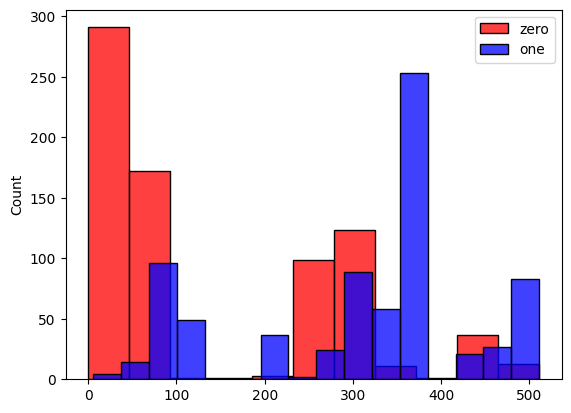

In [11]:
sns.histplot(Number_given_zero,color='red',label="zero")
sns.histplot(Number_given_one,color='blue',label="one")
plt.legend()
plt.show()

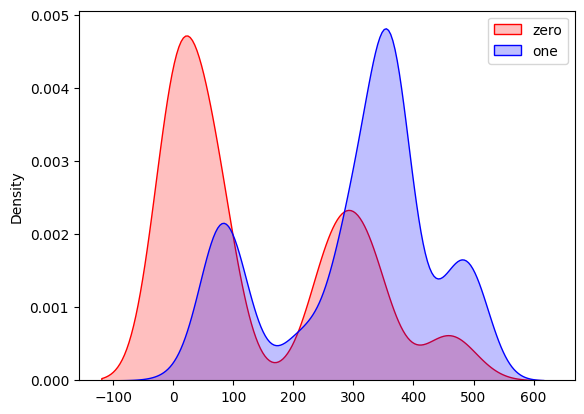

In [12]:
sns.kdeplot(Number_given_zero,color='red',label="zero",fill=True)
sns.kdeplot(Number_given_one,color='blue',label="one",fill=True)
plt.legend()
plt.show()

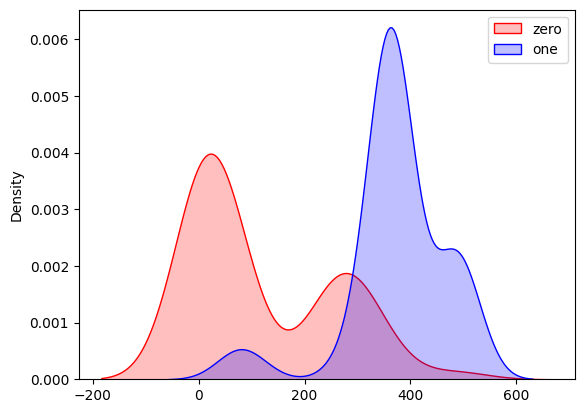

In [13]:
sns.kdeplot(Number_given_zero_test,color='red',label="zero",fill=True)
sns.kdeplot(Number_given_one_test,color='blue',label="one",fill=True)
plt.legend()
plt.show()

**The probabilty of the given image being zero  or one is given by:**
$$P(\text{One} \mid \text{Number}) = \frac{f(\text{Number} \mid \text{One}) \cdot P(\text{One})}{ f(\text{Number} \mid \text{Zero}) \cdot P(\text{Zero})+ f(\text{Number} \mid \text{Zero}) \cdot P(\text{Night)}}$$
where $f$ is the pdf of the distributions

$$ P(One)=P(Zero)= \frac{1} {2} $$

In [14]:
from scipy.stats import gaussian_kde
import matplotlib.image as mpimg

In [15]:
def compute_num(image_path):
    image = Image.open(image_path)
    image=np.array(image)
    image=image.flatten()
    image=(image/255)
    num=0
    for i in range(1,len(image)+1):
        num += math.pow(2,len(image)-i)*image[i-1]
    return num

In [16]:
def prob(image_path):
    
    num=compute_num(image_path)
    pdf_n_given_zero=gaussian_kde(Number_given_zero)
    pdf_n_given_one=gaussian_kde(Number_given_one)
    prob_one=pdf_n_given_one(num)/(pdf_n_given_one(num)+pdf_n_given_zero(num))
    return prob_one

In [17]:
def prob_one_dir(dir):
    count=0
    files=os.listdir(dir)
    for file in files:
        image_path=os.path.join(dir,file)
        if(prob(image_path)[0]>0.5):
            count+=1
    return(count)

In [23]:
print(f"Accuarcy of Predicting 0 : {1-prob_one_dir(dir_test_zero)/len(os.listdir(dir_test_zero))}")
## 100 images are used for testing

Accuarcy of Predicting 0 : 0.86


In [24]:
print(f"Accuarcy of Predicting 1 : {prob_one_dir(dir_test_one)/len(os.listdir(dir_test_one))}")
## 100 images are used for testing

Accuarcy of Predicting 1 : 0.96


In [25]:
import os
from tkinter import *
from PIL import Image, ImageDraw, ImageOps

In [26]:
CM_TO_PIXELS = 37.8  #

## chane to specific directory
save_folder = '/home/abhishek/Documents/workspace/Sem-5/Probabilty_Random_Processs/Classifier/Dataset_Processed/User_In'
os.makedirs(save_folder, exist_ok=True)

digit_count = 0

In [28]:
def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black", width=2)  
    draw.line([x1, y1, x2, y2], fill="black", width=2)

def save_and_convert():
    global digit_count, image
    bitwise_save_path = convert_to_bitwise()
    root.quit()

def convert_to_bitwise():
    global digit_count
    img = image.convert('L')
    img = img.resize((3, 3), Image.Resampling.LANCZOS)

    img_array = np.array(img)
    bitwise_img = (img_array > 230).astype(int)
    bitwise_img_vis = Image.fromarray((bitwise_img * 255).astype(np.uint8))

    bitwise_save_path = os.path.join(save_folder, f'bitwise_digit_{digit_count + 1}.png')
    bitwise_img_vis.save(bitwise_save_path)
    return bitwise_save_path

### Run this script to test wheter the model works for your images

In [ ]:
root = Tk()
root.title("Handwrite Digits")

canvas_width = int(CM_TO_PIXELS)
canvas_height = int(CM_TO_PIXELS)

canvas = Canvas(root, width=canvas_width, height=canvas_height, bg="white")
canvas.pack()

image = Image.new("RGB", (canvas_width, canvas_height), "white")
draw = ImageDraw.Draw(image)

canvas.bind("<B1-Motion>", paint)

button_frame = Frame(root)
button_frame.pack()

btn_save = Button(button_frame, text="Save and Convert", command=save_and_convert)
btn_save.grid(row=0, column=0)

root.mainloop()

if(prob(convert_to_bitwise())[0]>0.5):
    print("You wrote one")
    print(prob(convert_to_bitwise()))
else:
    print("You wrote zero")
    print(prob(convert_to_bitwise()))

    

### It will appear like this 

In [29]:
import matplotlib.image as mpimg

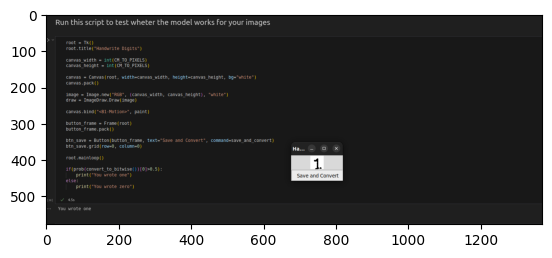

In [30]:
img=np.array(mpimg.imread("/home/abhishek/Documents/workspace/Sem-5/Probabilty_Random_Processs/Classifier/one.png"))
plt.imshow(img)
plt.show()

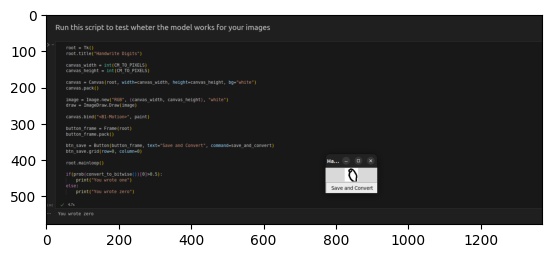

In [31]:
img=np.array(mpimg.imread("/home/abhishek/Documents/workspace/Sem-5/Probabilty_Random_Processs/Classifier/zero.png"))
plt.imshow(img)
plt.show()